In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions, TransitionPotential, EELSDetector
from abtem import SMatrix, Potential, GridScan
from ase import units
from ase.io import read



In [2]:
Z = 13 # atomic number
n = 2 # principal quantum number
l = 1 # azimuthal quantum number
order =1
xc = 'PBE' # exchange-correlation functional

transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=1,order=order)

print('bound electron configuration:', transitions.bound_configuration)
print('ionic electron configuration:', transitions.excited_configuration)

bound electron configuration: 1s2 2s2 2p6 3s2 3p1
ionic electron configuration: 1s2 2s2 2p5 3s2 3p1


Transitions: 100%|██████████| 3/3 [00:47<00:00, 15.91s/it]


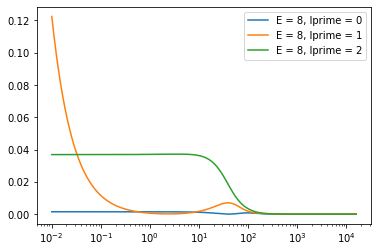

In [5]:
for e in [8]:
    transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=e*units.Rydberg,order=order)
    gos,k = transitions.get_gos(dirac=False)
    new_k = k
    index = (new_k)**2>0.01
    for lp in range(3):
        # plt.plot(((new_k[index])**2),np.sum(gos[:],axis=0)[index],label=f'E = {e}')
        plt.plot(((new_k[index])**2),gos[lp][index],label=f'E = {e}, lprime = {lp}')
plt.xscale('log')
plt.legend()

Transitions: 100%|██████████| 3/3 [00:10<00:00,  3.47s/it]


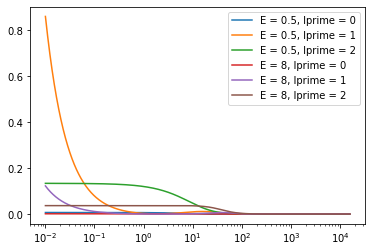

In [4]:
for e in [0.5,8]:
    transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=e*units.Rydberg,order=order)
    gos,k = transitions.get_gos(dirac=False)
    new_k = k*2*np.pi
    index = (new_k)**2>0.01
    for lp in range(3):
        # plt.plot(((new_k[index])**2),np.sum(gos[:],axis=0)[index],label=f'E = {e}')
        plt.plot(((new_k[index])**2),gos[lp][index],label=f'E = {e}, lprime = {lp}')
plt.xscale('log')
plt.legend()

In [14]:
from sympy.physics.wigner import wigner_3j
float(wigner_3j(0,0,0, 0, 0, 0))**2

1.0

In [15]:
wigner_3j(0,0,0, 0, 0, 0)

1

In [ ]:
kmax=20
kgpts=1024
k = np.geomspace(1e-7,kmax,num=kgpts)

In [ ]:
plt.plot(np.log(k),np.sum(gos,axis=0))

In [ ]:
for i in range(4):
    plt.plot(np.real(gos[i]))

In [ ]:
r = np.linspace(0, 10, 10000)
r[None]

In [ ]:
1/(10/1024)/2

In [ ]:
units.Bohr

In [ ]:
plt.plot(np.sum(np.real(gos),axis=0)[:10])

In [ ]:
plt.plot(np.real(gos[4]))

In [ ]:
atomic_transition_potentials = transitions.get_transition_potentials(extent = 1,
                                                                       gpts = 256,
                                                                       energy = 100e3)

fig, axes = plt.subplots(1,4, figsize = (20,5))

for ax, atomic_transition_potential in zip(axes, atomic_transition_potentials):
    # print(str(atomic_transition_potential))
    atomic_transition_potential.show(ax = ax, title = str(atomic_transition_potential),cbar=True)

In [ ]:
transitions